In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import nltk

In [2]:
df=pd.read_csv("Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [4]:
df.shape

(568454, 10)

In [5]:
df['Score'].value_counts()
#Rating

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

[]

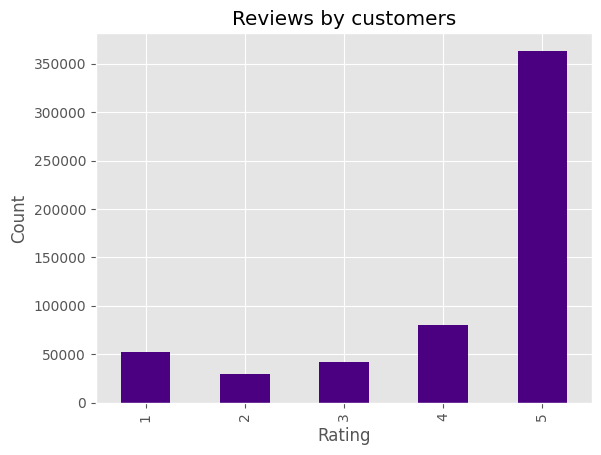

In [6]:
#plotting bar graph
plt=df['Score'].value_counts().sort_index().plot(kind='bar', 
                                                title="Reviews by customers",
                                                color="indigo" )
plt.set_xlabel("Rating")
plt.set_ylabel("Count")
plt.plot()

[]

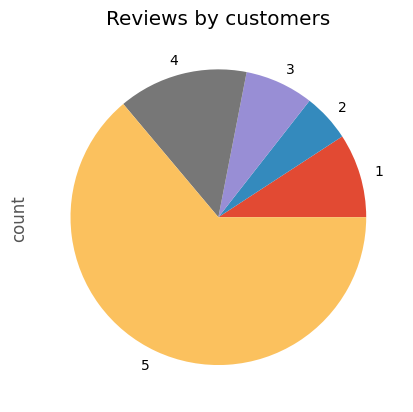

In [7]:
#Plotting Pie chart
plt=df['Score'].value_counts().sort_index().plot(kind='pie', 
                                                title="Reviews by customers")
plt.plot()

In [8]:
df['UserId'].value_counts()

UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
A2O8OFVSTO9PF3      1
A1C6KXG47GAQ7B      1
A1TU5DS89D9OVD      1
A3N005JS5FG5FI      1
A3LGQPJCZVL9UC      1
Name: count, Length: 256059, dtype: int64

In [9]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [10]:
df.dropna(inplace=True)
#since the dataset is very huge

In [11]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

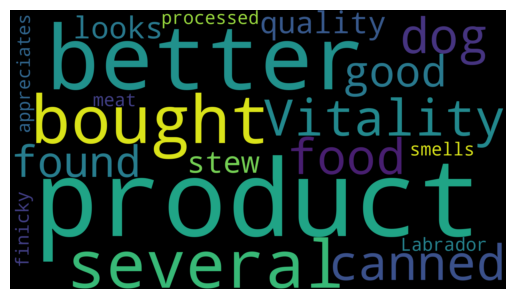

In [12]:
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
text = df.Text[0]

wordcloud = WordCloud(width=1920,height=1080).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#Creating a word cloud

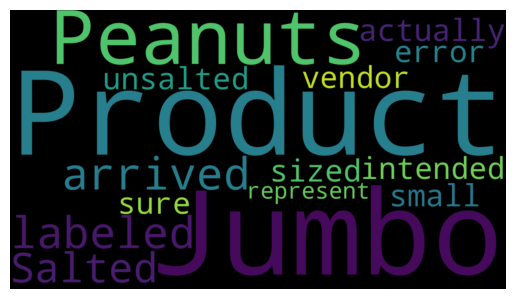

In [13]:
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
text = df.Text[1]

wordcloud = WordCloud(width=1920,height=1080).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
df=df.head(100000)
#Out of 500k rows we are taking 100k for our datset

In [15]:
sentence= df['Text'][1]
sentence

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [16]:
tokens=nltk.word_tokenize(sentence)

#To view tokens
tokens

['Product',
 'arrived',
 'labeled',
 'as',
 'Jumbo',
 'Salted',
 'Peanuts',
 '...',
 'the',
 'peanuts',
 'were',
 'actually',
 'small',
 'sized',
 'unsalted',
 '.',
 'Not',
 'sure',
 'if',
 'this',
 'was',
 'an',
 'error',
 'or',
 'if',
 'the',
 'vendor',
 'intended',
 'to',
 'represent',
 'the',
 'product',
 'as',
 '``',
 'Jumbo',
 "''",
 '.']

In [17]:
#Printing Frequency Distribution
from nltk.probability import FreqDist
freq_dist = FreqDist(tokens)
print(freq_dist)
freq_dist.most_common(3)

#In the given nltk input sentence, we have 31 samples and 37 outcomes. The top 3 common words with high frequency are ‘the’ with 3, ‘as’ with 2, and ‘Jumbo ‘with 2.

<FreqDist with 31 samples and 37 outcomes>


[('the', 3), ('as', 2), ('Jumbo', 2)]

In [18]:
import nltk
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

#for our project, it is not that necessary to remove them

{'against', 'about', 'some', 'as', 'whom', 'were', "couldn't", 'very', "you've", 'by', 'd', 'from', "it's", 'which', 'has', 'for', 'during', 'you', 'll', 'ain', 'up', 'm', 'yourself', 'between', 'more', "weren't", 'they', 'having', 'been', 'your', 'only', 'further', 'off', 'will', 'she', 'here', 'mustn', 'most', "wouldn't", 'who', 'haven', 'there', 'mightn', 'doesn', 'my', 'it', 'an', 'own', 'himself', "needn't", 'until', "you'd", 'why', 'too', 'in', 'he', 'over', 'to', 'y', 'our', 're', 'below', 'their', 'didn', "didn't", 'did', 'wasn', 'shan', 'needn', 't', 'ourselves', 'should', 'hadn', 'nor', "won't", 'both', 've', 'myself', 'when', "aren't", "that'll", 'at', "hasn't", 'few', 'themselves', 'than', 'because', 'or', 'above', "haven't", 'same', 'again', "shan't", 's', "you're", 'the', 'of', 'me', 'o', 'yourselves', 'while', 'all', 'where', 'don', "doesn't", 'doing', 'her', 'shouldn', 'a', 'once', 'them', 'with', 'are', 'itself', "shouldn't", 'am', 'before', 'any', 'ma', 'through', 'ca

In [19]:
parts_of_speech=nltk.pos_tag(tokens)
parts_of_speech

[('Product', 'NNP'),
 ('arrived', 'VBD'),
 ('labeled', 'VBN'),
 ('as', 'IN'),
 ('Jumbo', 'NNP'),
 ('Salted', 'NNP'),
 ('Peanuts', 'NNP'),
 ('...', ':'),
 ('the', 'DT'),
 ('peanuts', 'NNS'),
 ('were', 'VBD'),
 ('actually', 'RB'),
 ('small', 'JJ'),
 ('sized', 'VBN'),
 ('unsalted', 'JJ'),
 ('.', '.'),
 ('Not', 'RB'),
 ('sure', 'JJ'),
 ('if', 'IN'),
 ('this', 'DT'),
 ('was', 'VBD'),
 ('an', 'DT'),
 ('error', 'NN'),
 ('or', 'CC'),
 ('if', 'IN'),
 ('the', 'DT'),
 ('vendor', 'NN'),
 ('intended', 'VBN'),
 ('to', 'TO'),
 ('represent', 'VB'),
 ('the', 'DT'),
 ('product', 'NN'),
 ('as', 'IN'),
 ('``', '``'),
 ('Jumbo', 'NNP'),
 ("''", "''"),
 ('.', '.')]

In [20]:
#Vader Sentiment Analysis

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
SIA=SentimentIntensityAnalyzer()

In [21]:
SIA.polarity_scores(sentence)
#Here the customer is complaining that the product was labeled as large-sized, but the actual product is small-sized. This is probably a negative sentence. As expected, 
#our Vader model also gave a negative compound, saying it’s a negative sentence.

{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}

In [22]:
#create empty dictionary to store results
results={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    myid=row['Id']
    results[myid]=SIA.polarity_scores(text)
Vaders=pd.DataFrame(results).T
Vaders= Vaders.reset_index().rename(columns={'index': 'Id'})
Vaders=Vaders.merge(df,how='left')
Vaders

#We created polarity scores for all the texts in the data frame and got negative, neutral, positive, and compound scores for each. 
#Then we merged this data into the original data frame and created the Vader data frame.

  0%|          | 0/100000 [00:00<?, ?it/s]

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,100004,0.045,0.715,0.240,0.9230,B000LQORDE,A1GPN9X27K5WN,"Chase A Byrd ""byrd720""",0,2,5,1319932800,Awesome!,I don't see how anyone could say anything bad ...
99996,100005,0.000,0.786,0.214,0.8746,B000LQORDE,ALK1W410A1W6L,Matthew R. Jacks,0,2,5,1319932800,Yummy Fast,These are very good noodles - better than the ...
99997,100006,0.000,0.649,0.351,0.9501,B000LQORDE,A38LOGKDYZ0ZC6,hlfrk414,0,2,5,1319673600,Good ramen.,Very spicy packaged ramen. Good for someone wh...
99998,100007,0.000,0.660,0.340,0.8834,B000LQORDE,ASVMD19XFJEDB,Steve R,0,2,5,1317859200,Spicey,"Delicious, awesome spicey noodle has there own..."
